In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [ ]:
def error_graph(error):
  t = np.arange(0, len(error))
  plt.plot(t, error)
  plt.title("Epoch (t) vs Error")
  plt.xlabel("Epochs")
  plt.ylabel("Error")

In [ ]:
def visualize_fit(data, pred):
  x = list(data["x"])
  y = list(data["y"])
  a = pd.DataFrame({'x': x, 'pred': pred})
  a = a.sort_values(by="x")
  plt.plot(a["x"], a["pred"], label="Predictions", color="orange")
  plt.scatter(x, y, label="Actual Values", color="blue")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.grid(True)
  plt.legend()
  plt.show()

In [ ]:
def normalize(data):
  mean = data.describe().loc["mean"]
  std = data.describe().loc["std"]
  data = (data - mean) / std
  return data

In [ ]:
df = pd.read_csv("/content/regression_data.dat", names=['x','y'], sep=' ')
train_data, test_data = train_test_split(df, test_size=0.2, random_state=51)

train_data = normalize(train_data)
test_data = normalize(test_data)

In [ ]:
train_data

,x,y
65,1.527903,0.302093
12,-0.656576,-0.838175
32,-0.908769,-0.751025
82,0.397782,1.093495
66,-0.725608,1.968380
...,...,...
16,-0.927487,-0.746690
69,-0.435207,0.160367
73,2.213576,1.989596
96,1.261379,1.749135


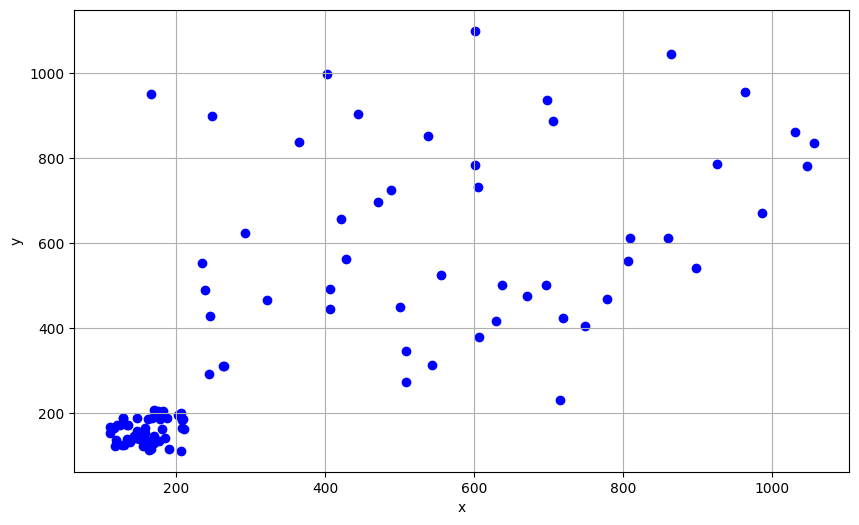

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## **Nonlinear Regression:**

For both cases set $\alpha^{(0)} = 0.5, η = 0.9, ϵ = 0.001, J^{(0)} = 3$ (i.e. initial number of hidden units),
 and assume that the output neuron is a linear threshold unit (i.e. $g(h) = h$)  and each hidden
 neuron is a nonlinear threshold unit with sigmoidal activation factor $g(h) = \frac{1}{1+e^{-h}}$





 ### **(a)**
  Design a multi-layer perceptron with one output unit, one input terminal and one hidden
 layer, train it on the 80% of the data (train data) given in file “regression data.dat” and
 determine a reasonable number of hidden units using the other 20% of the data (test data).
 The perceptron is illustrated in Figure 1.

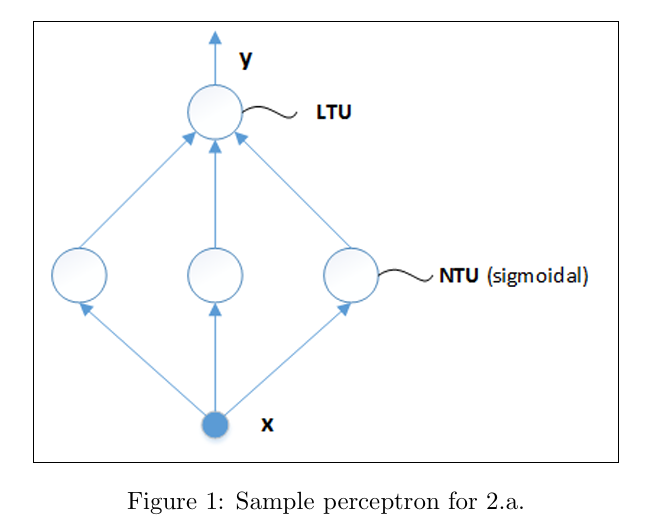

In [ ]:
# define the linear threshold unit (LTU), g(h) = h
def LTU(x):
  return x

# its derivative
def dLTU(x):
  return 1

# define the nonlinear theshold unit, g(h) = 1/1+e^-h
def NTU(x):
  return 1/ (1+np.exp(-x))

# its derivative
def dNTU(x):
    return NTU(x) * (1 - NTU(x))

In [ ]:
def find_best_number_of_hidden_units(data):

  infinity = float('inf')

  q = 1
  J = [q]
  # average test error, start with E0, set to a very large number
  E = [infinity]
  # variance on the test set
  s = [0]
  N = len(data)

  while True:

    pred, _ = predict(data, q)
    e = (data["y"] - pred)
    MSE = np.sum(e**2) / N
    variance = np.sum((MSE - e**2))**2
    E.append(MSE)
    s.append(variance)


    if E[q] >= E[q-1]:
      display(pd.DataFrame({"E": E, "Variance": s}))
      return J[q-1]

    J.append(q)
    q += 1

In [ ]:
def multi_layer_network(data, J, alpha=0.5, eta=0.9, epsilon=1e-3):

  features = [column for column in data.columns if column != "y"]
  target = "y"

  X = []

  for f in features:
      X.append(list(data[f]))
  y = list(data[target])
  K = len(X)
  P = len(data)


  w = np.random.uniform(size=(K, J))
  W = np.random.uniform(size=J)

  h = np.zeros(J)
  H = np.zeros(J)

  SSE = []

  while True:
    total_error = 0
    for p in range(P):

      for j in range(J):

        h[j] = sum([w[k][j] * X[k][p] for k in range(K)])
        H[j] = NTU(h[j])

      o = sum([W[j] * H[j] for j in range(J)])
      O = LTU(o)

      error = (y[p] - O) ** 2
      total_error += error

      delta_output = 2 * (y[p] - O) * dLTU(o)

      delta_hidden = np.zeros(J)
      for j in range(J):
        delta_hidden[j] = dNTU(h[j]) * W[j] *  delta_output

      for j in range(J):
        W[j] += alpha * delta_output * H[j]

      for j in range(J):
        for k in range(K):

          w[k][j] += alpha * delta_hidden[j] * X[k][p]

    SSE.append(total_error)
    alpha = eta * alpha
    if alpha < epsilon:
      break

  return w, W, SSE

In [ ]:
def predict(data, J):

  w, W, SSE = multi_layer_network(data, J)

  features = [column for column in data.columns if column != "y" ]
  target = "y"

  X = []

  for f in features:
    X.append(list(data[f]))
  y = list(data[target])
  K = len(X)
  P = len(data)
  h = np.zeros(J)
  H = np.zeros(J)
  preds = []
  for p in range(P):
      for j in range(J):

        h[j] = sum([w[k][j] * X[k][p] for k in range(K)])
        H[j] = NTU(h[j])

      o = sum([W[j] * H[j] for j in range(J)])
      O = LTU(o)
      preds.append(O)

  return preds, SSE[-1]

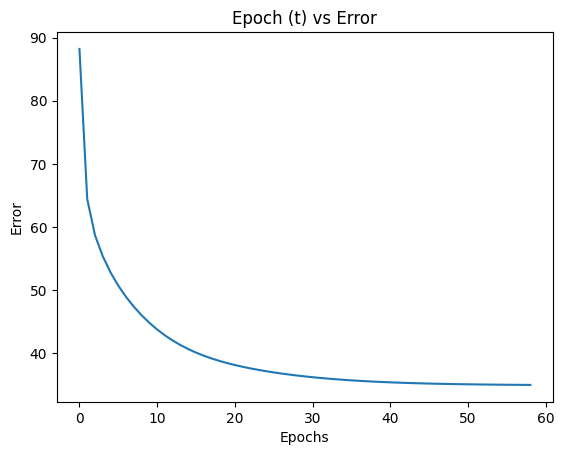

In [ ]:
w, W, SSE = multi_layer_network(train_data, 3)
error_graph(SSE)

In [ ]:
best_number = find_best_number_of_hidden_units(test_data)
print("\n")
print("best number of hidden units: ", best_number)

,E,Variance
0,inf,0.000000e+00
1,0.732440,1.774937e-30
2,0.520934,3.155444e-30
3,0.521238,7.888609e-31




best number of hidden units:  2


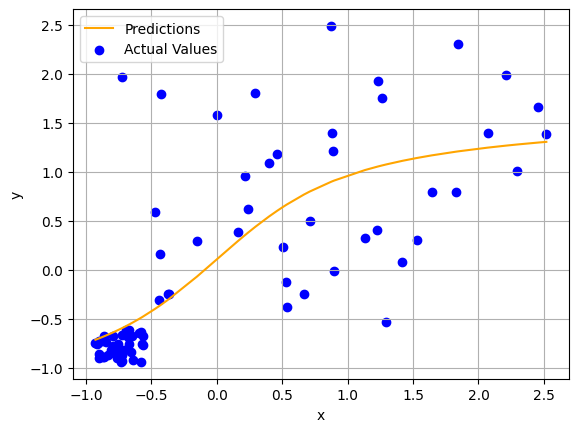

In [ ]:
pred, _ = predict(train_data, best_number)
visualize_fit(train_data, pred)

In [ ]:
training_SSE = np.sum(train_data["y"] - pred)**2

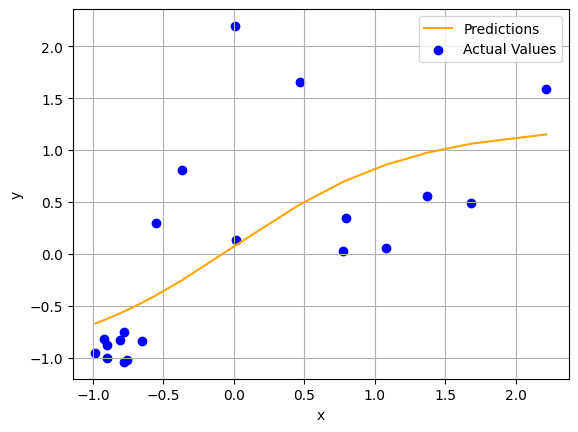

In [ ]:
pred, _ = predict(test_data, best_number)
visualize_fit(test_data, pred)

In [ ]:
test_SSE = np.sum(test_data["y"] - pred)**2
N = len(test_data)
test_MSE = test_SSE / N
variance_test_MSE = 1/(N-1) * np.sum((test_MSE - (test_data["y"] - pred)**2)**2)

### **(b)**
Design a multi-layer perceptron with one output unit, two input terminals (one for x and
 one for $x^2$) and one hidden layer, train it on the 80% of the data (train data) given in file
 “regression data.dat” and determine a reasonable number of hidden units using the other
 20% of the data (test data). The perceptron is illustrated for three hidden units in Figure
 2

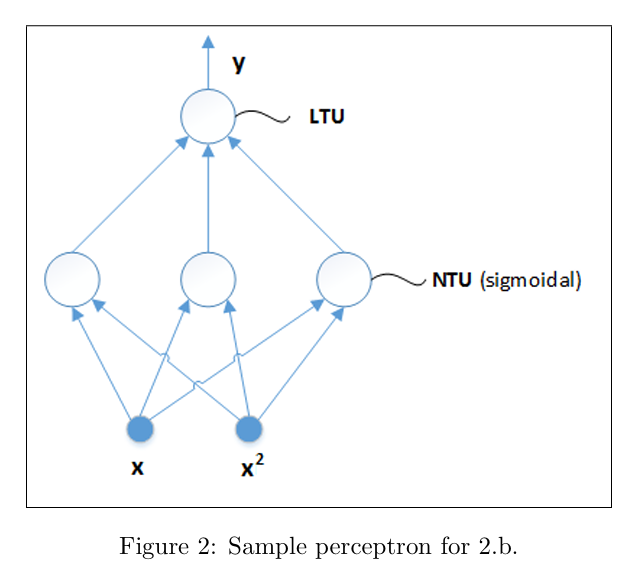

In [ ]:
df2 = pd.read_csv("/content/regression_data.dat", names=['x','y'], sep=' ')

In [ ]:
df2["x2"] = df2["x"] * df2["x"]
df2 = df2[["x", "x2", "y"]]
train_data, test_data = train_test_split(df2, test_size=0.2, random_state=51)

train_data = normalize(train_data)
test_data = normalize(test_data)

In [ ]:
test_data.head(3)

,x,x2,y
71,0.773379,0.485624,0.030390
43,-0.781573,-0.684014,-1.040563
11,-0.982814,-0.737085,-0.952622


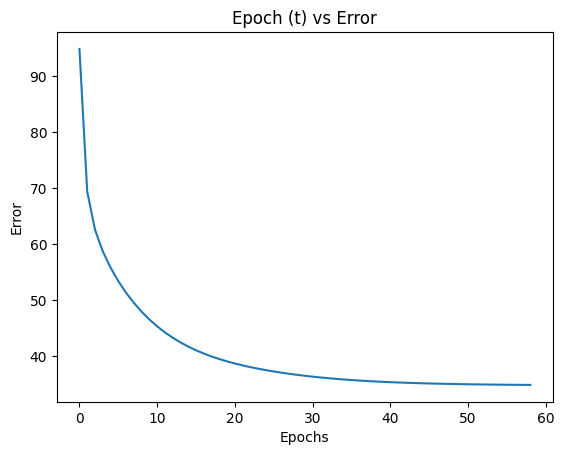

In [ ]:
w, W, SSE = multi_layer_network(train_data, 3)
error_graph(SSE)

In [ ]:
best_number = find_best_number_of_hidden_units(test_data)
print("\n")
print("best number of hidden units: ", best_number)

,E,Variance
0,inf,0.000000e+00
1,0.744938,0.000000e+00
2,0.473066,1.774937e-30
3,0.453489,7.888609e-31
4,0.521997,1.972152e-31




best number of hidden units:  3


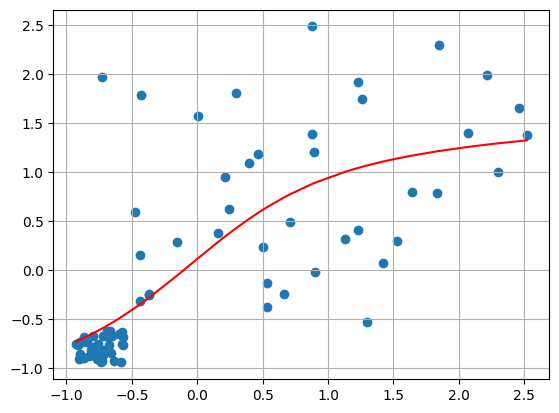

In [ ]:
pred, _ = predict(train_data, best_number)
result_frame = pd.DataFrame({"x": list(train_data["x"]), "pred": pred})
result_frame = result_frame.sort_values(by="x")
plt.scatter(train_data["x"], train_data["y"])
plt.plot(result_frame["x"], result_frame["pred"], color="red")
plt.grid(True)
plt.show();

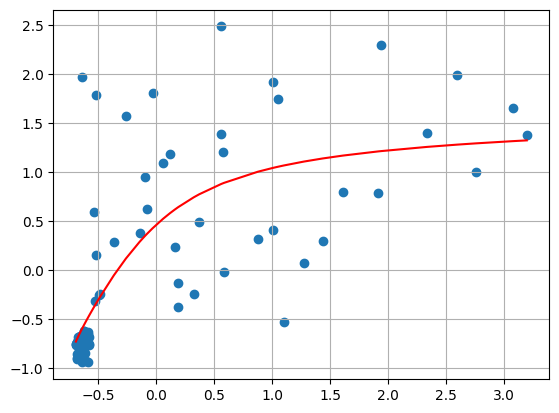

In [ ]:
result_frame = pd.DataFrame({"x2": list(train_data["x2"]), "pred": pred})
result_frame = result_frame.sort_values(by="x2")
plt.scatter(train_data["x2"], train_data["y"])
plt.plot(result_frame["x2"], result_frame["pred"], color="red")
plt.grid(True)
plt.show();

In [ ]:
training_SSE_2 = np.sum(train_data["y"] - pred)**2

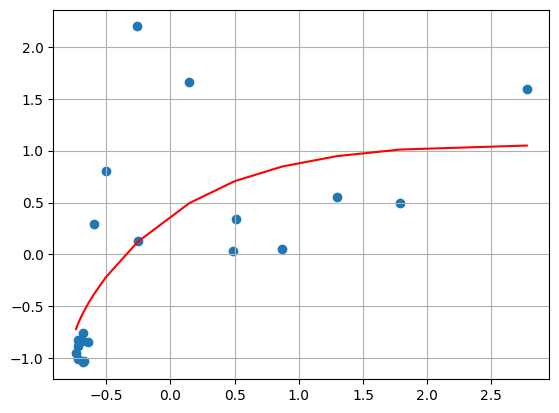

In [ ]:
pred, _ = predict(test_data, best_number)
result_frame = pd.DataFrame({"x2": list(test_data["x2"]), "pred": pred})
result_frame = result_frame.sort_values(by="x2")
plt.scatter(test_data["x2"], test_data["y"])
plt.plot(result_frame["x2"], result_frame["pred"], color="red")
plt.grid(True)
plt.show();

In [ ]:
test_SSE_2 = np.sum(test_data["y"] - pred)**2
N = len(test_data)
test_MSE_2 = test_SSE_2 / N
variance_test_MSE_2 = 1/(N-1) * np.sum((test_MSE_2 - (test_data["y"] - pred)**2)**2)

Report for cases:

In [ ]:
pd.DataFrame({
    "Method" : ["2.(a)", "2.(b)"],
    "Training SSE" : [training_SSE, training_SSE_2],
    "Test MSE": [test_MSE, test_MSE_2],
    "s2 for Test MSE": [variance_test_MSE, variance_test_MSE_2]
})

,Method,Training SSE,Test MSE,s2 for Test MSE
0,2.(a),0.129322,0.001592,1.292501
1,2.(b),0.104532,0.000290,1.200708
